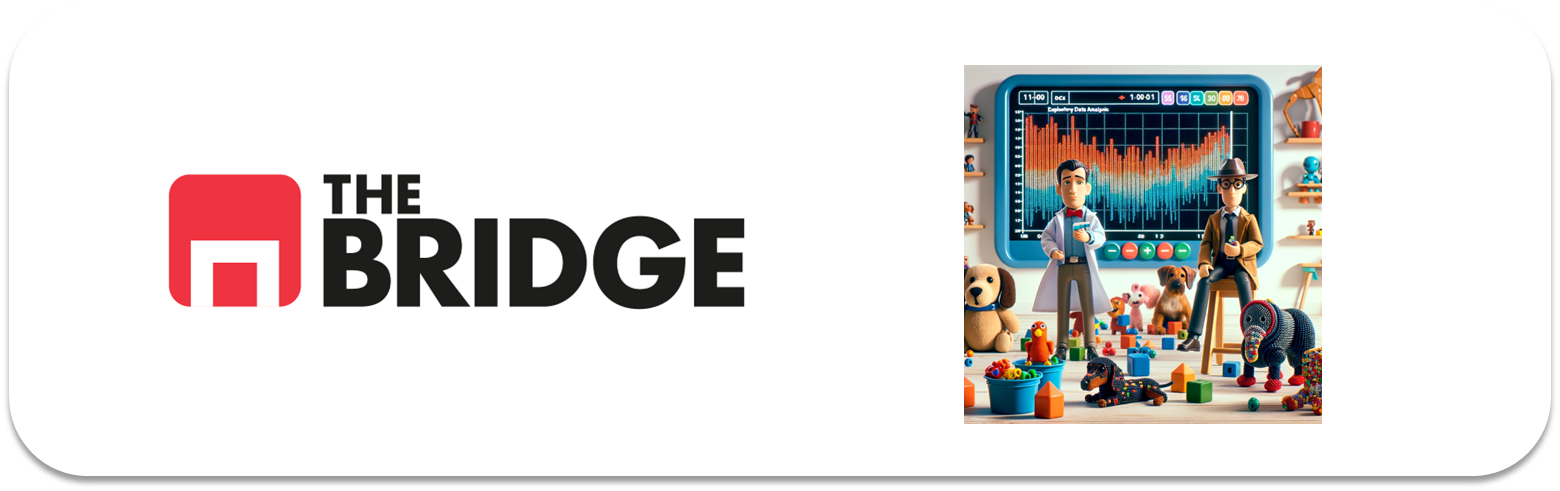

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot
from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, grafico_dispersion_con_correlacion

from scipy import stats
from scipy.stats import mannwhitneyu 

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [3]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [4]:
df_titanic = df_titanic.drop(columns=["survived", "deck", "pclass", "embarked"])
df_titanic.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [ ]:
# Crear la nueva columna "family_members" sumando "parch" y "sibsp"
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]

# Eliminar las columnas originales "parch" y "sibsp"
df_limpio = df_titanic.drop(columns=["parch", "sibsp"])

df_limpio

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [8]:
# Calcular la moda de la columna "embark_town"
moda_embark_town = df_limpio["embark_town"].mode()[0]

# Imputar la moda en los valores nulos de "embark_town"
df_limpio["embark_town"].fillna(moda_embark_town, inplace=True)

# Verificar los cambios
print(df_limpio["embark_town"].isnull().sum())  # Esto debe dar 0 si todos los nulos fueron imputados

0


In [9]:
df_limpio

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [ ]:
# Calcular la media de "age" por grupo de "who"
media_edad_grupo = df_limpio.groupby("who")["age"].mean()

# Imputar la media correspondiente en los valores nulos de "age"
df_limpio["age"] = df_limpio.apply(                        #con apply recorro todas las filas del DF
    lambda row: media_edad_grupo[row["who"]] if pd.isnull(row["age"]) else row["age"],
    axis=1    #cada fila del data frame es un row y con lambda le aplico a cada fola el condicional
)

# Verificar los cambios
print(df_limpio["age"].isnull().sum())  # Esto debe dar 0 si todos los nulos fueron imputados

0


In [12]:
df_limpio

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,32.0,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

1. ¿Sobrevivieron más hombres mujeres o niños?
En términos absolutos:

alive   no  yes
who            
child   34   49
man    449   88
woman   66  205


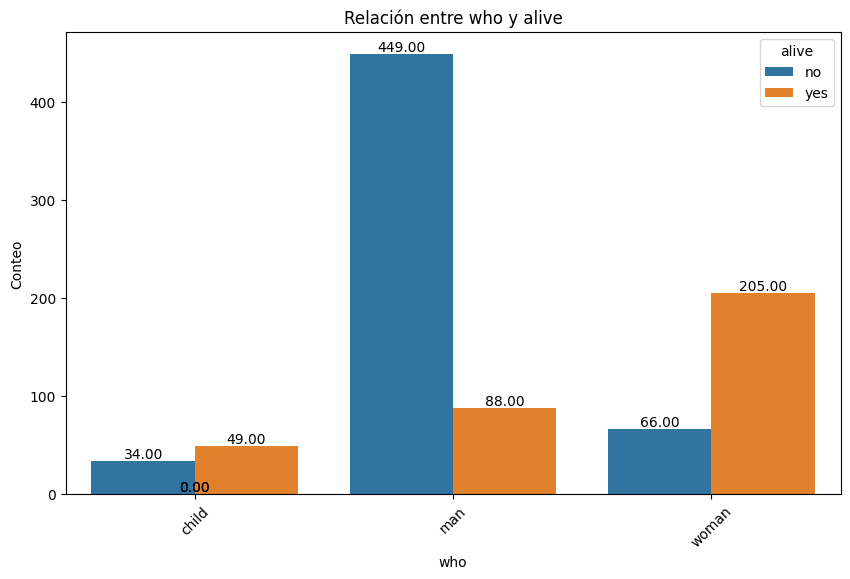

In [22]:
survival_by_sex = df_limpio.groupby("who")["alive"].value_counts().unstack()
print(survival_by_sex)
plot_categorical_relationship_fin(df_limpio, "who", "alive", show_values = True)

Sobrevivieron más mujeres

En términos relativos:

alive          no        yes
sex                         
female  25.796178  74.203822
male    81.109185  18.890815


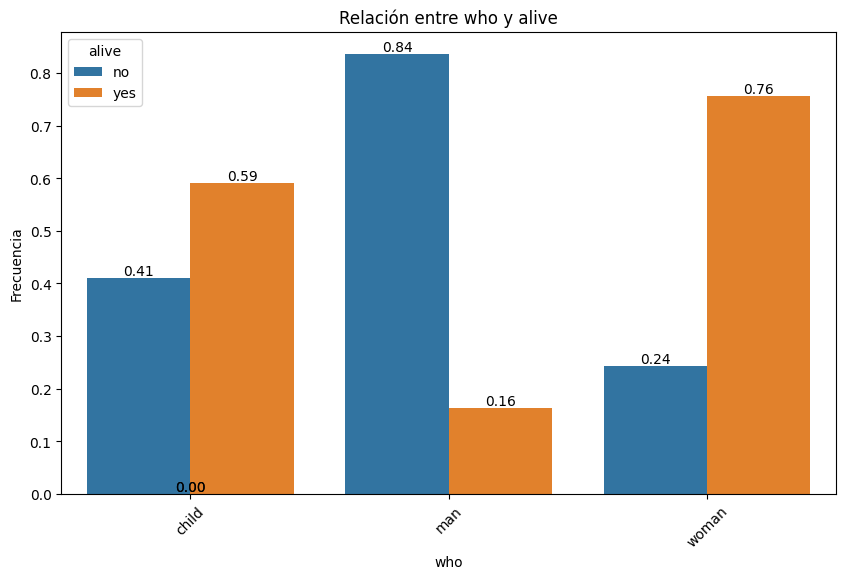

In [23]:
relative_survival_by_sex = df_limpio.groupby("sex")["alive"].value_counts(normalize=True).unstack() * 100
print(relative_survival_by_sex)
plot_categorical_relationship_fin(df_limpio, "who", "alive", relative_freq= True, show_values=True)

En términos relativos sobrevivieron más hombres.

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

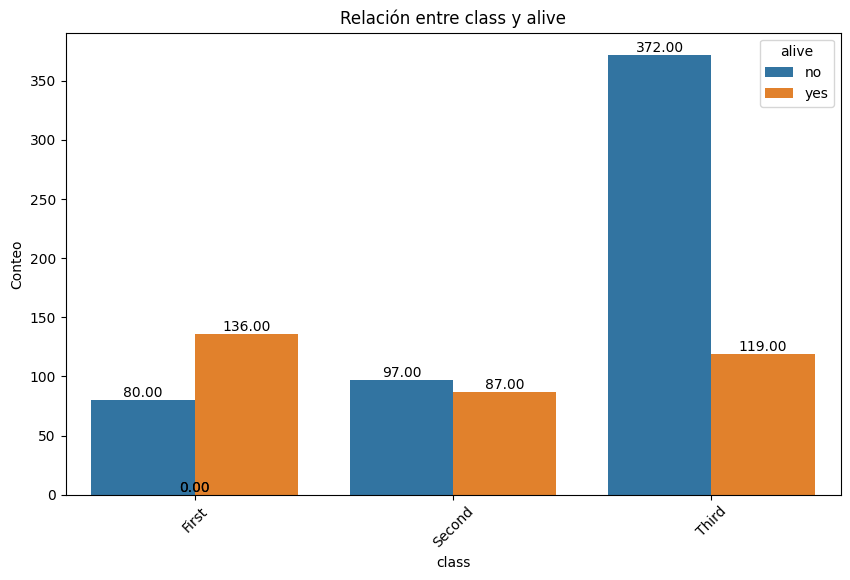

In [24]:
plot_categorical_relationship_fin(df_limpio, "class", "alive", relative_freq= False, show_values=True)

En términos absolutos sobrevivieron más de primera clase

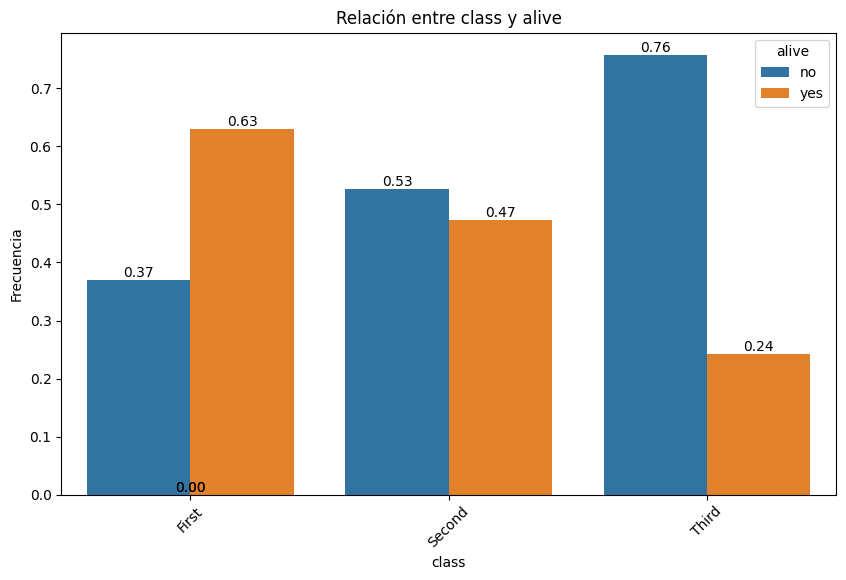

In [25]:
plot_categorical_relationship_fin(df_limpio, "class", "alive", relative_freq= True, show_values=True)

Y en términos relativos los de tercera.

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [27]:
df_jun = pd.read_csv("./data/dataset_viajes_jun.csv")
df_jun.head()

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23


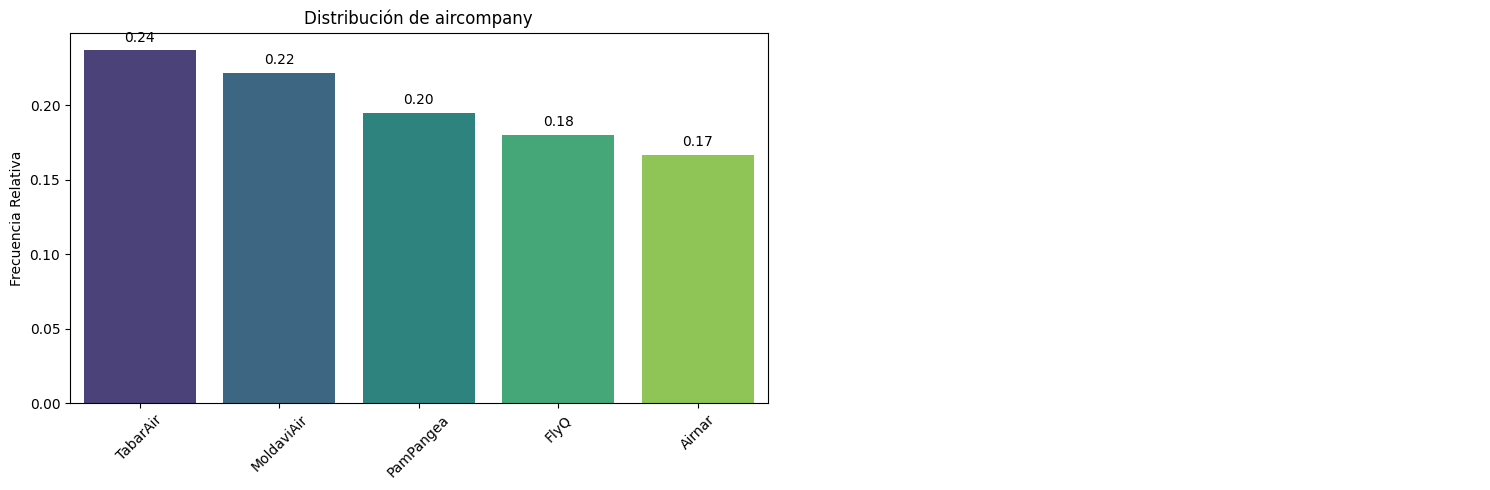

In [28]:
pinta_distribucion_categoricas(df_jun,["aircompany"], relativa = True, mostrar_valores=True)

Tabar Air es la que más viajes hace

(2,)


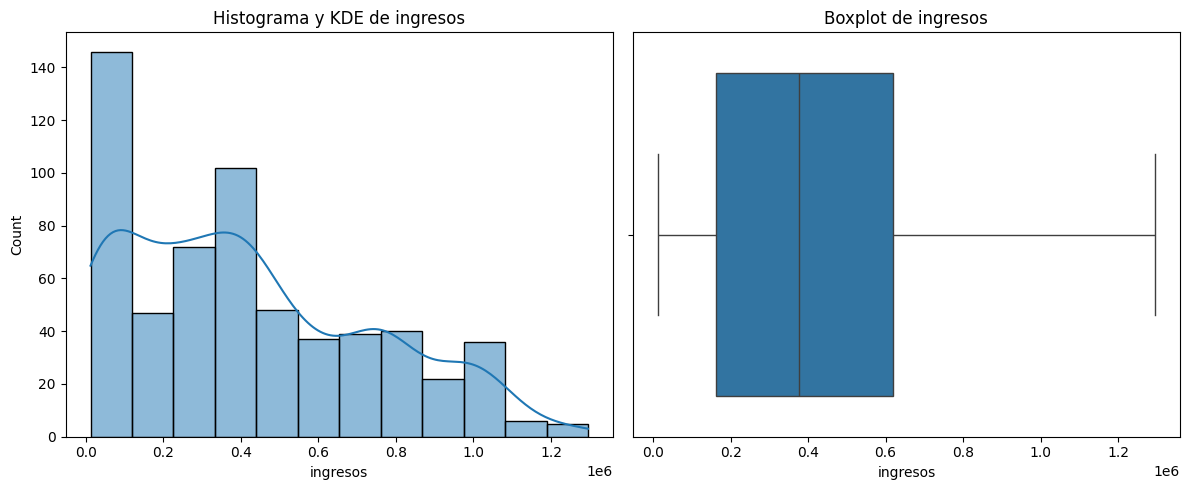

In [29]:
plot_combined_graphs(df_jun, ["ingresos"])

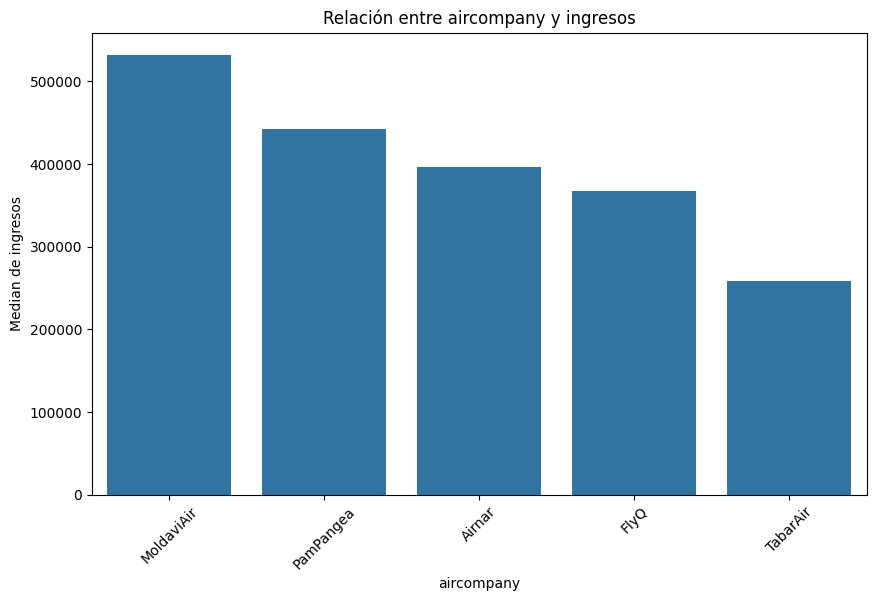

In [30]:
plot_categorical_numerical_relationship(df_jun, "aircompany", "ingresos", measure = "median")

Los ingresos de Tabar Air son los más pequeños, pese a ser la que más viajes hace.

Voy a coger los datos de Tabar Air solamente

In [43]:
df_tabar = df_jun[df_jun["aircompany"]=="TabarAir"]
df_tabar

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.9072,626,584789.19,Tab_GiLo_11380,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.7440,518,438535.07,Tab_CiRo_10747,Jun23
10,TabarAir,Los Angeles,Cincinnati,3073,Boeing 737,False,7915.4334,253,111056.67,Tab_LoCi_10737,Jun23
12,TabarAir,Cincinnati,Los Angeles,3073,Boeing 747,False,32758.1800,224,184079.01,Tab_CiLo_10747,Jun23
13,TabarAir,Ginebra,Londres,739,Airbus A380,False,8542.8400,69,46200.30,Tab_GiLo_11380,Jun23
...,...,...,...,...,...,...,...,...,...,...,...
572,TabarAir,Roma,Cincinnati,7480,Boeing 737,False,18358.1640,588,258737.92,Tab_RoCi_10737,Jun23
582,TabarAir,Ginebra,Cincinnati,6969,Airbus A380,False,85395.3384,484,423371.06,Tab_GiCi_11380,Jun23
587,TabarAir,Cincinnati,Londres,6284,Airbus A380,False,77728.0528,438,404542.35,Tab_CiLo_11380,Jun23
593,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,108387.6004,626,550268.31,Tab_GiLo_11380,Jun23


### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


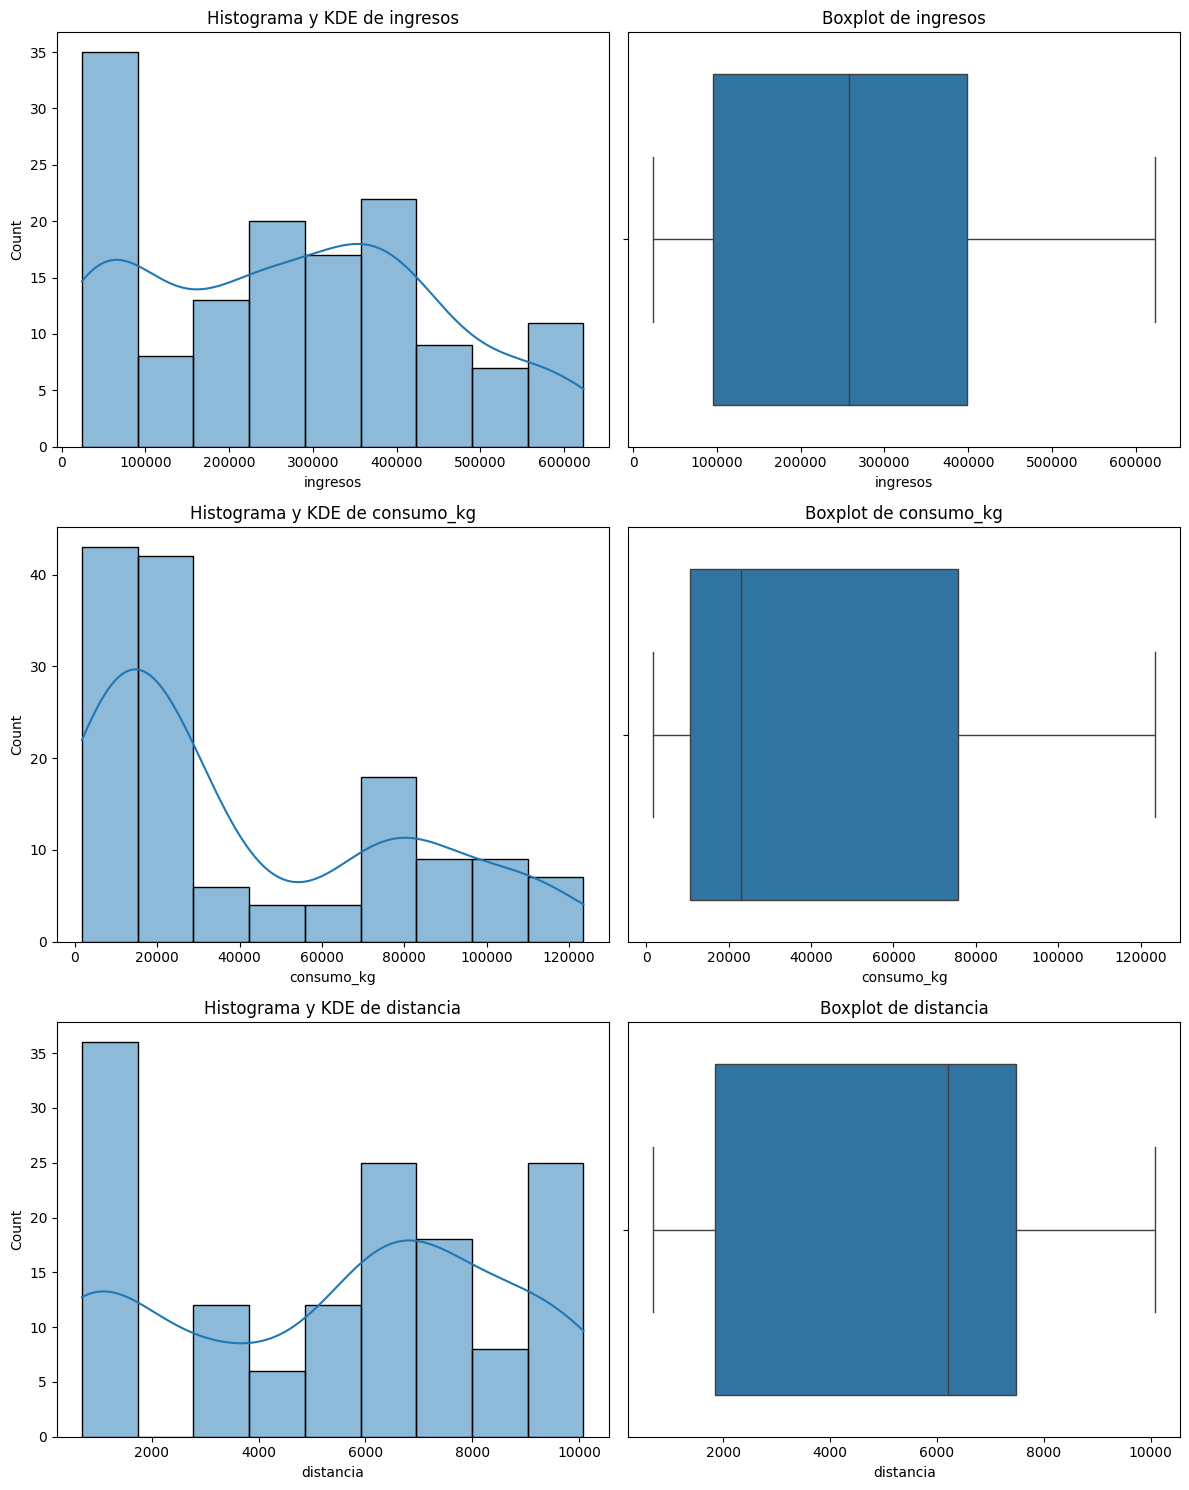

In [44]:
plot_combined_graphs(df_tabar,["ingresos", "consumo_kg", "distancia"])

Voy a analizar dos a dos

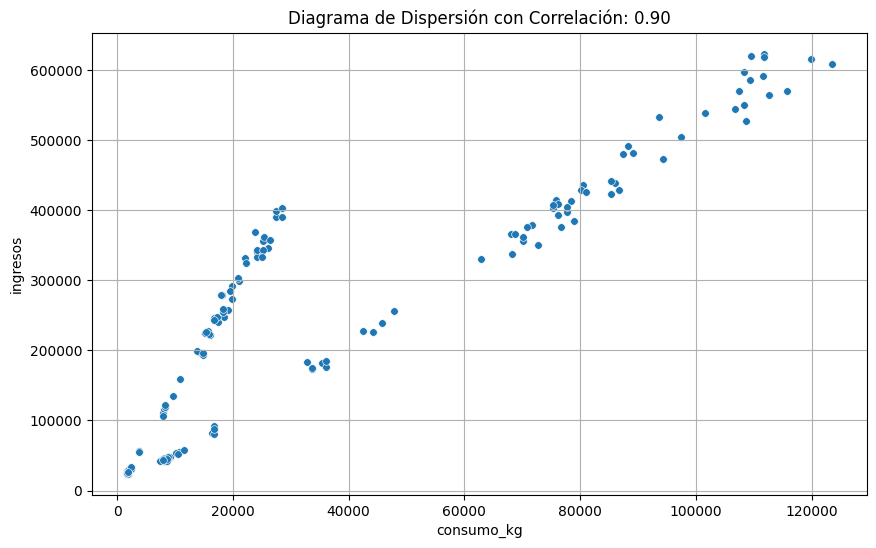

In [45]:
grafico_dispersion_con_correlacion(df_tabar,"consumo_kg", "ingresos", 
                                   mostrar_correlacion= True, tamano_puntos= 30)

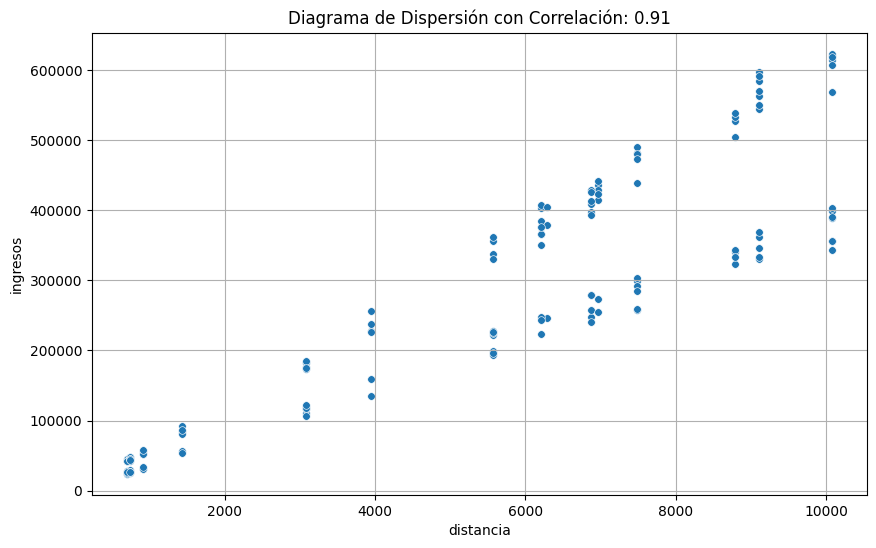

In [46]:
grafico_dispersion_con_correlacion(df_tabar,"distancia","ingresos", 
                                   mostrar_correlacion= True, tamano_puntos= 30)

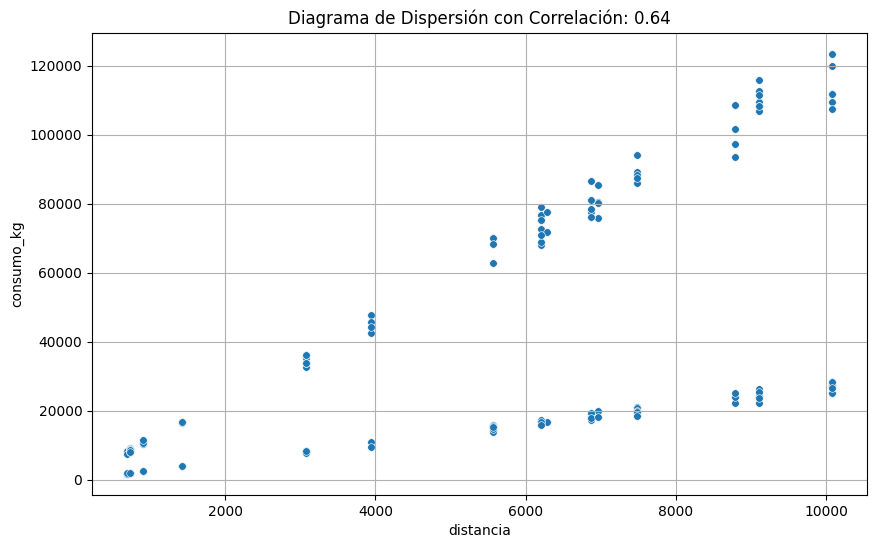

In [47]:
grafico_dispersion_con_correlacion(df_tabar,"distancia","consumo_kg", 
                                   mostrar_correlacion= True, tamano_puntos= 30)

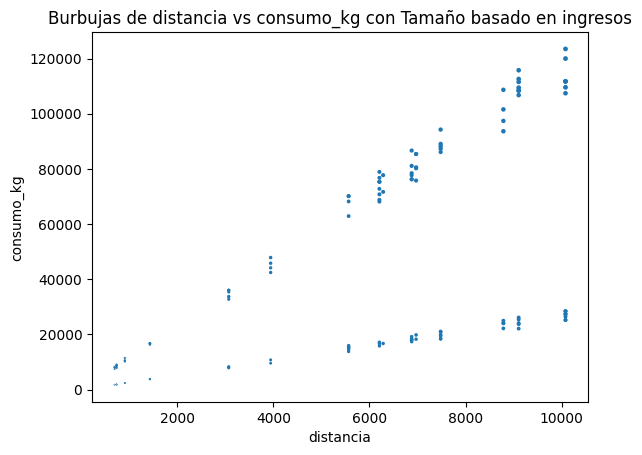

In [48]:
bubble_plot(df_tabar,"distancia","consumo_kg","ingresos", scale = 100000)

Si hago la matriz de correlación:

In [49]:
corr_matrix = df_tabar.corr(numeric_only= True) 
# Si no lo pones y tienes variables tipo texto, fallará7
corr_matrix

,distancia,con_escala,consumo_kg,duracion,ingresos
distancia,1.000000,0.335370,0.636121,0.978315,0.906568
con_escala,0.335370,1.000000,-0.243258,0.504064,0.084604
consumo_kg,0.636121,-0.243258,1.000000,0.478955,0.897862
duracion,0.978315,0.504064,0.478955,1.000000,0.812624
ingresos,0.906568,0.084604,0.897862,0.812624,1.000000


Y con el mapa de calor:

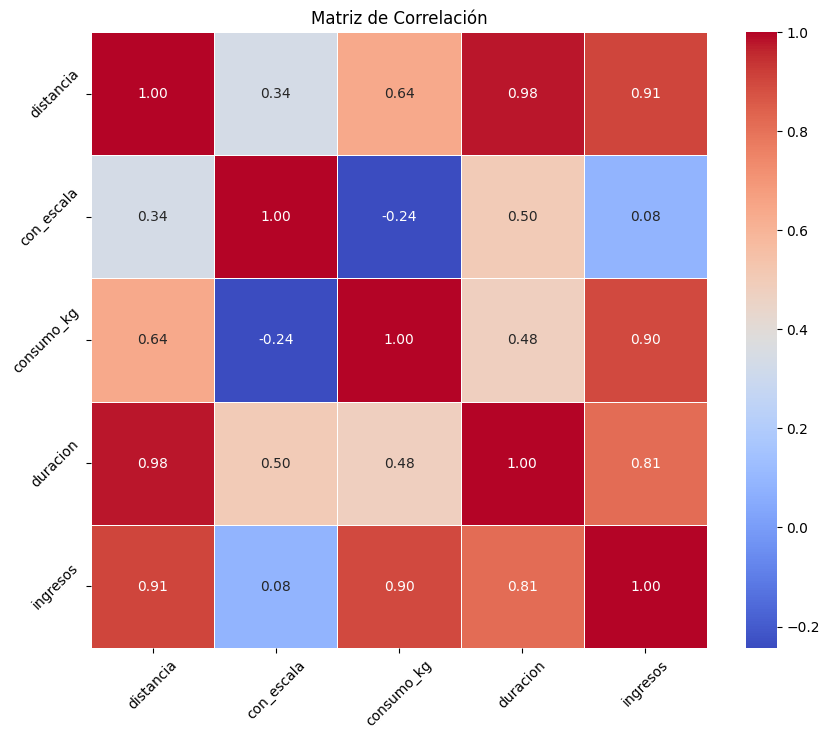

In [50]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5) 


plt.title('Matriz de Correlación')
plt.xticks(rotation=45) 
plt.yticks(rotation=45)  

plt.show()


A colores más rojos hay correlaciones muy positivas. 
Distancia se correlaciona fuertemente con duración y con ingresos. Algo más débil con consumo_kg. 
El consumo correlaciona también altamente con ingresos y muy poco con la escala que por otra parte sólo correlaciona con la duración (como es lógico) y sólo en cierto modo.
La duración va a correlacionar con distancia  y con ingresos.
Los ingresos, por su parte se ven correlacionados con todo menos con la escala.
Tabar Air ingresa menos, su correlación más fuerte es con la distancia.


In [51]:
df_solo_numeros = df_tabar.select_dtypes(include = ["float","int"])
df_solo_numeros.columns

Index(['distancia', 'consumo_kg', 'duracion', 'ingresos'], dtype='object')

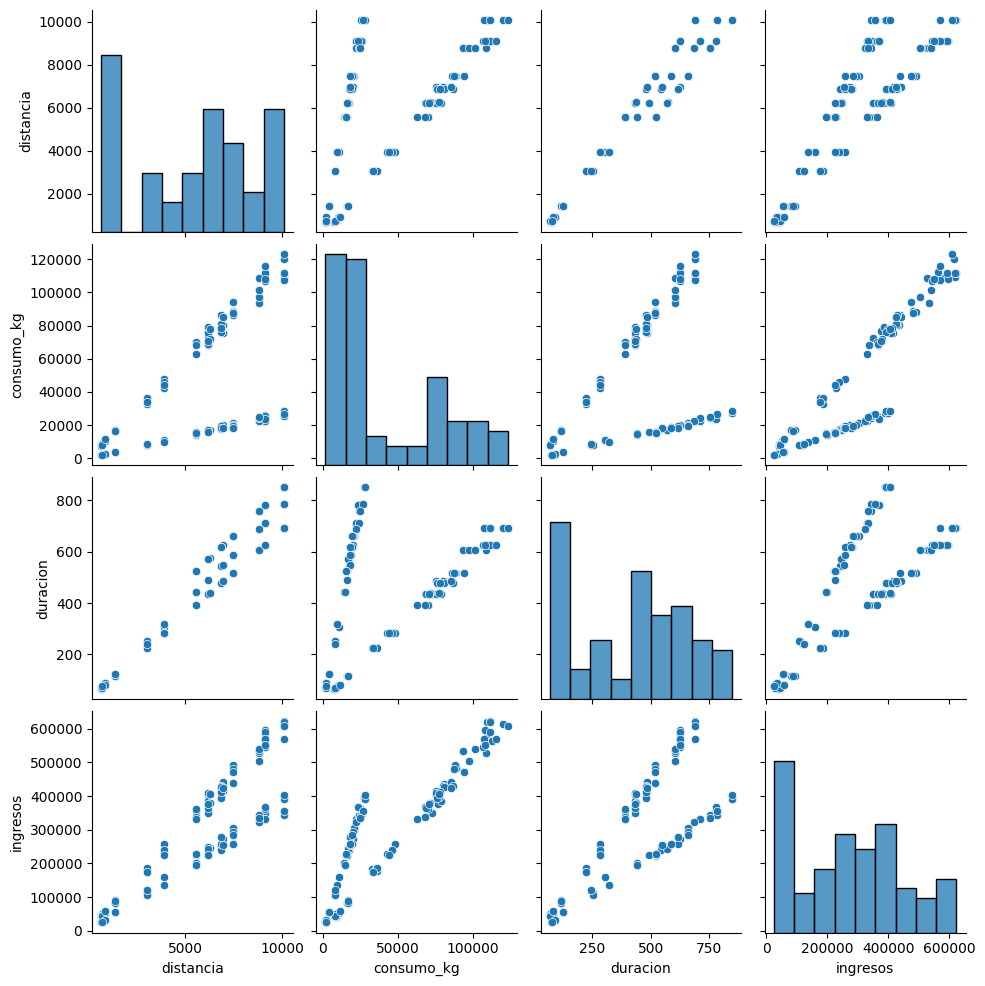

In [52]:
sns.pairplot(df_solo_numeros)
plt.show()

Si voy al histograma distancia-distancia veo que Tabar Air recorre distancias más bien cortas. Aunque también tiene cierta actividad relevante en distancias más largas. Si saco las frecuencias:

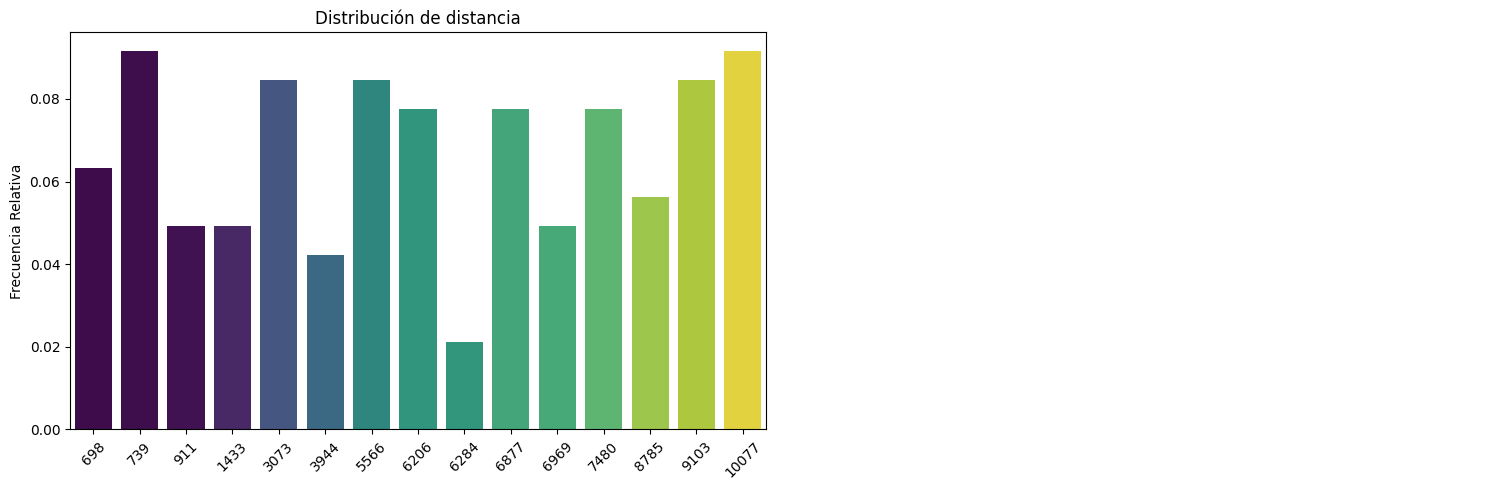

In [57]:
pinta_distribucion_categoricas(df_tabar,["distancia"], relativa= True)

Vemos que TabarAir realiza vuelos con mucha frecuencia en distancias tanto bajas como medias como altas, con lo cual creo que los menores ingresos no se ven justificados por vuelos cortos. Quizá un diagrama de cajas y bigotes nos dé más información:

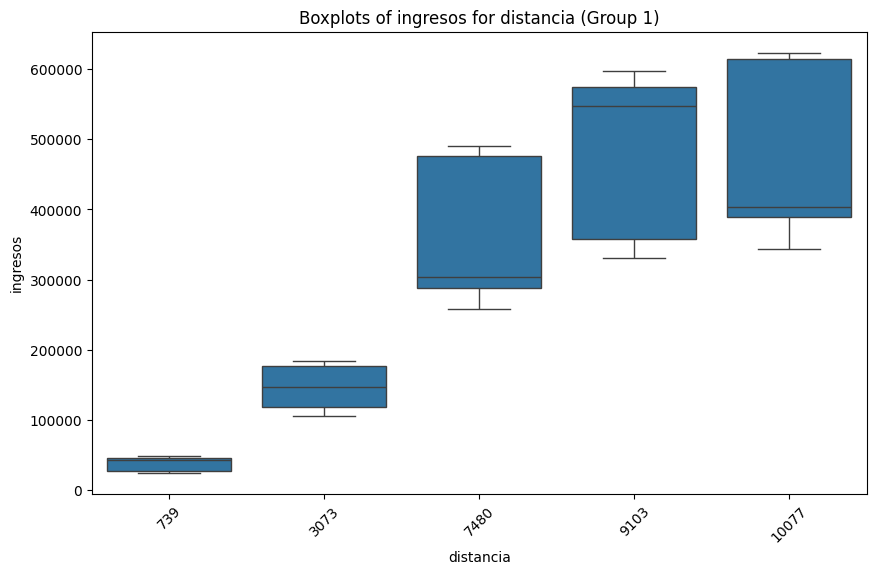

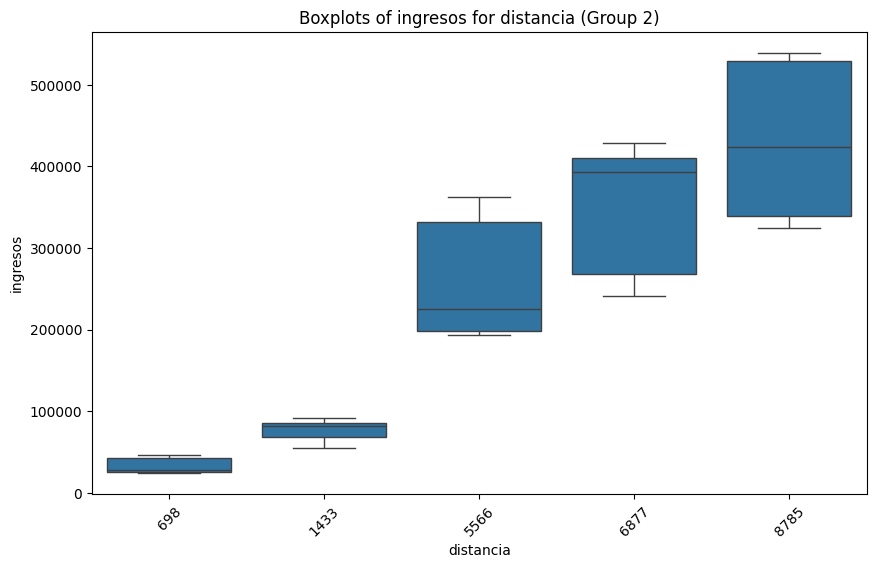

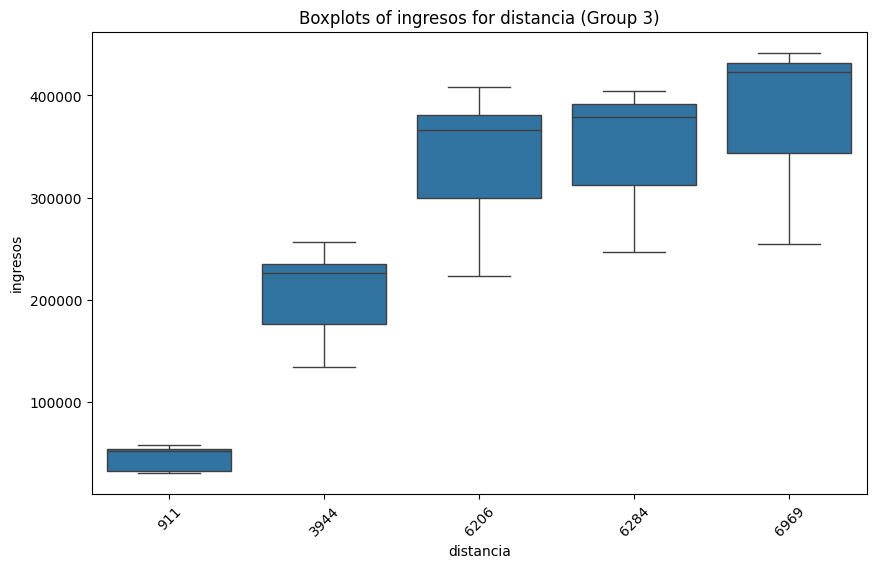

In [62]:
plot_grouped_boxplots(df_tabar, "distancia", "ingresos")

El gráfico nos muestra la relación entre las distancias de los vuelos y los ingresos generados por cada tipo de vuelo. A medida que la distancia aumenta los ingressos tienden a ser mayores. Las líeas de los bigotes se elevan progresivamente conla distancia. Para vuelos cortos los ingresos son significativamente menores a comparación de los vuelos largos como el de distancia 10077 que tiene el mayor ingreso de todos.
Para vuelos largos, la dispersión de ingresos es mayor, lo que parece proyectar que los ingresos generados en estos vuelos son muy variables.
En la caja para la distancia mayor y de más ingresos, vemos que la mediana está en la zona inferior de la caja de manera muy clara. Esto quiere decir que los datos están sesgados, hay una concentración de datos hacia la parte inferior del rango intercuartílico. También puede suceder que esté sesgado por la influencia de outliers.

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Realiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [ ]:
# Crear los rangos basados en la distribución de "distancia"
bins = [0, 2000, 7000, 10000, df_tabar["distancia"].max()]  # Ajusta los límites según los datos
labels = ["Corto", "Medio", "Largo", "Muy Largo"]

# Crear una copia segura del subconjunto (evita la advertencia que me sale de que estoy modificando un DF)
df_tabar2 = df_tabar[df_tabar["aircompany"] == "TabarAir"].copy()

# Crear la nueva columna categórica "cat_vuelo" usando .loc
df_tabar2.loc[:, "cat_vuelo"] = pd.cut(df_tabar2["distancia"], bins=bins, labels=labels)

# Verificar la distribución de la nueva columna
print(df_tabar2["cat_vuelo"].value_counts())

cat_vuelo
Medio        62
Corto        36
Largo        31
Muy Largo    13
Name: count, dtype: int64


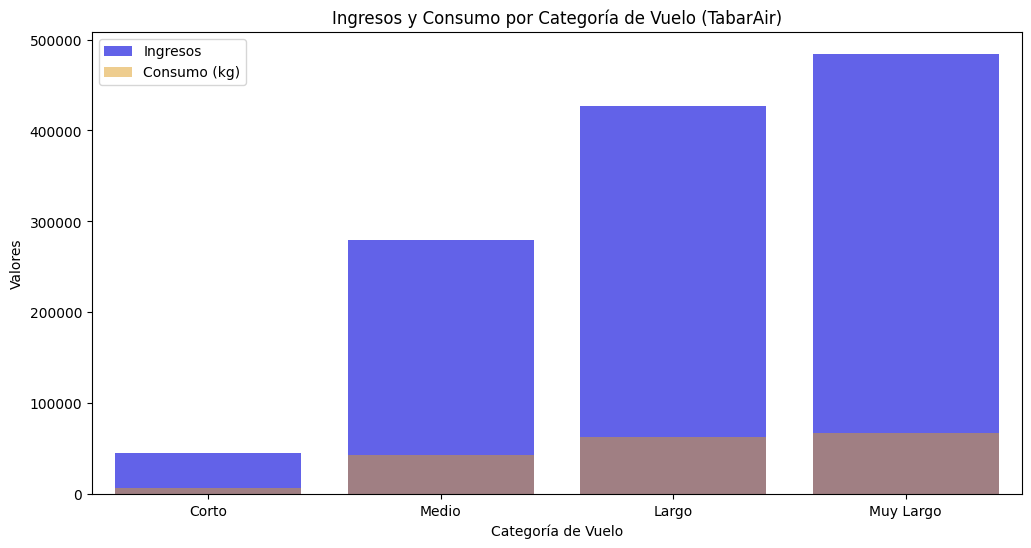

In [66]:
#visualización de los datos:
# Crear un gráfico de barras para analizar ingresos y consumo por categoría de vuelo
plt.figure(figsize=(12, 6))
sns.barplot(data=df_tabar2, x="cat_vuelo", y="ingresos", errorbar=None, color="blue", label="Ingresos", alpha=0.7)
sns.barplot(data=df_tabar2, x="cat_vuelo", y="consumo_kg", errorbar=None, color="orange", label="Consumo (kg)", alpha=0.5)

# Personalizar el gráfico
plt.title("Ingresos y Consumo por Categoría de Vuelo (TabarAir)")
plt.xlabel("Categoría de Vuelo")
plt.ylabel("Valores")
plt.legend(loc="upper left")
plt.show()


Los ingresos y los consumos aumentan con la distancia pero los consumos aumentan mucho menos abruptamente que los ingresos. El consumo entre vuelos largos y muy largos se mantiene prácticamente igual así que en esos dos grupos habría que potenciar los ingresos de los largos.

In [68]:
# Calcular las medias de ingresos y consumo por categoría de vuelo
# Calcular las medias de ingresos y consumo por categoría de vuelo con observed=True
stats = df_tabar2.groupby("cat_vuelo", observed=True)[["ingresos", "consumo_kg"]].mean()
print("Media de ingresos y consumo por categoría de vuelo:")
print(stats)

# Calcular eficiencia promedio con observed=True
eficiencia_stats = df_tabar2.groupby("cat_vuelo", observed=True)["eficiencia"].mean()
print("\nEficiencia promedio (ingresos por kilogramo de combustible):")
print(eficiencia_stats)

Media de ingresos y consumo por categoría de vuelo:
                ingresos    consumo_kg
cat_vuelo                             
Corto       45853.164722   7208.456231
Medio      279066.188065  42969.965595
Largo      427250.338065  63042.199032
Muy Largo  483878.356154  67100.957046

Eficiencia promedio (ingresos por kilogramo de combustible):
cat_vuelo
Corto         8.971828
Medio         9.123719
Largo         9.609416
Muy Largo    10.005544
Name: eficiencia, dtype: float64


Como ya se sospechaba los ingresos por kilo de combustible gastado son mejores en los vuelos muy largos pero los largos están casi casi a la altura.

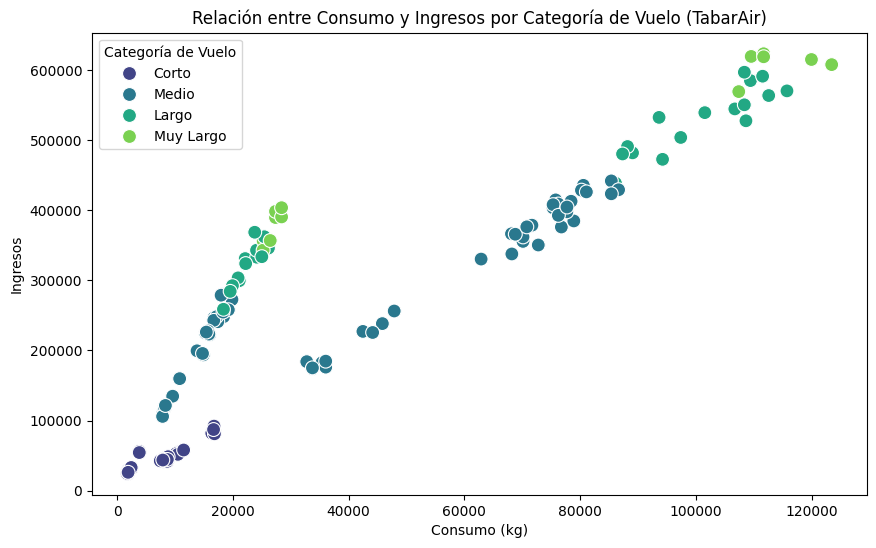

In [69]:
# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tabar, x="consumo_kg", y="ingresos", hue="cat_vuelo", palette="viridis", s=100)

# Personalizar el gráfico
plt.title("Relación entre Consumo y Ingresos por Categoría de Vuelo (TabarAir)")
plt.xlabel("Consumo (kg)")
plt.ylabel("Ingresos")
plt.legend(title="Categoría de Vuelo")
plt.show()

A mayor distancia mayor consumo y mayores ingresos también.

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.

In [73]:
# Crear ingreso por kilogramo consumido
df_tabar.loc[:, "ingreso_por_kg"] = df_tabar["ingresos"] / df_tabar["consumo_kg"]
df_tabar.loc[:, "kg_por_km"] = df_tabar["consumo_kg"] / df_tabar["distancia"]

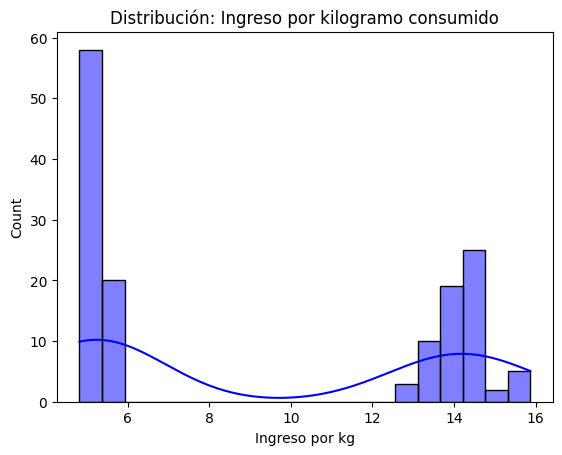

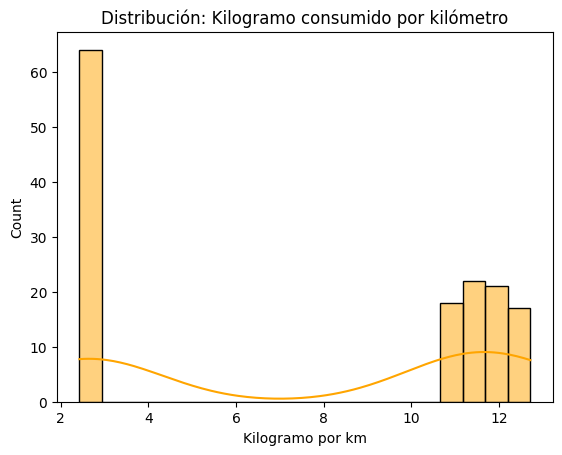

In [75]:
#Análisis univariante
# Distribución de ingreso por kilogramo consumido
sns.histplot(df_tabar["ingreso_por_kg"], kde=True, bins=20, color="blue")
plt.title("Distribución: Ingreso por kilogramo consumido")
plt.xlabel("Ingreso por kg")
plt.show()

# Distribución de kilogramo consumido por kilómetro
sns.histplot(df_tabar["kg_por_km"], kde=True, bins=20, color="orange")
plt.title("Distribución: Kilogramo consumido por kilómetro")
plt.xlabel("Kilogramo por km")
plt.show()

In [79]:
#viajes muy eficientes:
df_tabar = df_tabar[df_tabar["aircompany"]=="TabarAir"].copy()
df_tabar["supereficiente"] = (df_tabar["ingreso_por_kg"] > 5) & (df_tabar["kg_por_km"] < 0.1)

# Verificar la distribución de la variable
print(df_tabar["supereficiente"].value_counts())

supereficiente
False    142
Name: count, dtype: int64


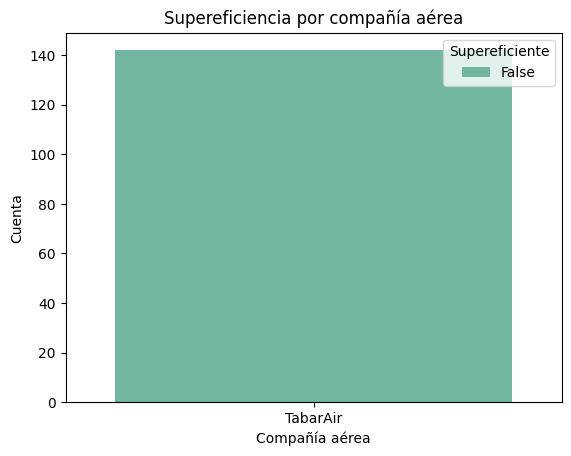

In [81]:
sns.countplot(data=df_tabar, x="aircompany", hue="supereficiente", palette="Set2")
plt.title("Supereficiencia por compañía aérea")
plt.xlabel("Compañía aérea")
plt.ylabel("Cuenta")
plt.legend(title="Supereficiente")
plt.show()

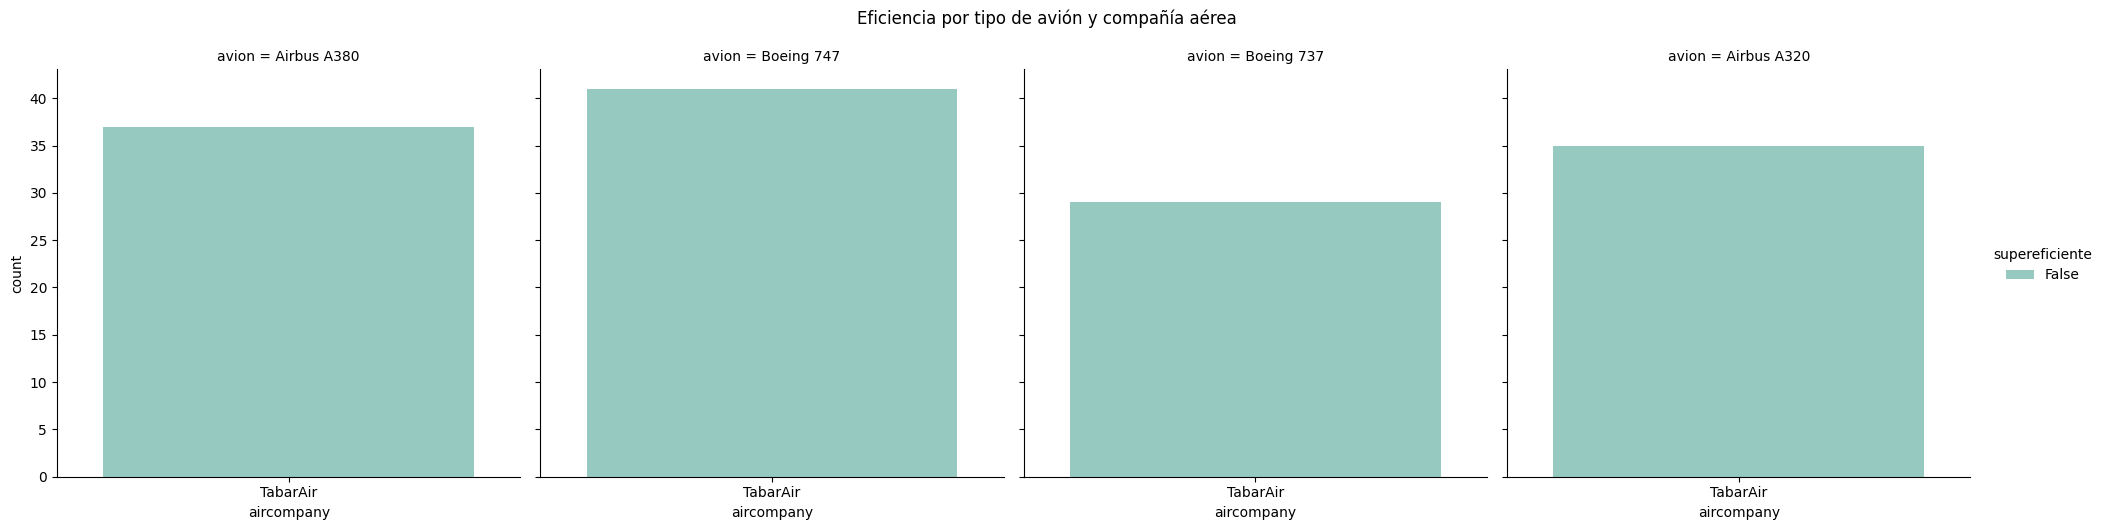

In [83]:
sns.catplot(data=df_tabar, x="aircompany", hue="supereficiente", col="avion", kind="count", palette="Set3", height=5, aspect=1)
plt.suptitle("Eficiencia por tipo de avión y compañía aérea", y=1.05)
plt.show()


El más eficiente es el Boeing 747.